In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly

Mounted at /content/drive


In [ ]:
d1=pd.read_csv('/content/drive/MyDrive/2021VAERSData.csv',encoding='ISO-8859-1')
d2=pd.read_csv('/content/drive/MyDrive/2021VAERSSYMPTOMS.csv')
d3=pd.read_csv('/content/drive/MyDrive/2021VAERSVAX.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,12,15,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
d13=d1[['VAERS_ID','DIED','SEX','AGE_YRS']]
d13

,VAERS_ID,DIED,SEX,AGE_YRS
0,916600,NaN,F,33.0
1,916601,NaN,F,73.0
2,916602,NaN,F,23.0
3,916603,NaN,F,58.0
4,916604,NaN,F,47.0
...,...,...,...,...
710579,1919868,NaN,F,83.0
710580,1919876,NaN,F,75.0
710581,1919878,Y,M,82.0
710582,1919904,NaN,M,20.0


In [ ]:
d12=d3[['VAX_TYPE','VAX_MANU','VAERS_ID']]

In [ ]:
d43=pd.merge(d12,d13,on='VAERS_ID')
d43

,VAX_TYPE,VAX_MANU,VAERS_ID,DIED,SEX,AGE_YRS
0,COVID19,MODERNA,916600,NaN,F,33.0
1,COVID19,MODERNA,916601,NaN,F,73.0
2,COVID19,PFIZER\BIONTECH,916602,NaN,F,23.0
3,COVID19,MODERNA,916603,NaN,F,58.0
4,COVID19,MODERNA,916604,NaN,F,47.0
...,...,...,...,...,...,...
750550,DTAPIPV,GLAXOSMITHKLINE BIOLOGICALS,1919957,NaN,F,4.0
750551,MMR,MERCK & CO. INC.,1919957,NaN,F,4.0
750552,VARCEL,MERCK & CO. INC.,1919957,NaN,F,4.0
750553,COVID19,PFIZER\BIONTECH,1919962,NaN,M,66.0


In [ ]:
d43=d43.query('VAX_TYPE==["COVID19"]')

In [ ]:
d43

,VAX_TYPE,VAX_MANU,VAERS_ID,DIED,SEX,AGE_YRS
0,COVID19,MODERNA,916600,NaN,F,33.0
1,COVID19,MODERNA,916601,NaN,F,73.0
2,COVID19,PFIZER\BIONTECH,916602,NaN,F,23.0
3,COVID19,MODERNA,916603,NaN,F,58.0
4,COVID19,MODERNA,916604,NaN,F,47.0
...,...,...,...,...,...,...
750519,COVID19,MODERNA,1919911,Y,F,NaN
750521,COVID19,PFIZER\BIONTECH,1919916,NaN,M,20.0
750533,COVID19,MODERNA,1919941,NaN,F,43.0
750553,COVID19,PFIZER\BIONTECH,1919962,NaN,M,66.0


In [ ]:
d43m=d43.query('SEX==["M"]')

In [ ]:
d43m

,VAX_TYPE,VAX_MANU,VAERS_ID,DIED,SEX,AGE_YRS
7,COVID19,MODERNA,916607,NaN,M,50.0
8,COVID19,MODERNA,916608,NaN,M,33.0
22,COVID19,PFIZER\BIONTECH,916619,NaN,M,28.0
23,COVID19,MODERNA,916620,NaN,M,65.0
32,COVID19,MODERNA,916629,NaN,M,61.0
...,...,...,...,...,...,...
750517,COVID19,MODERNA,1919878,Y,M,82.0
750518,COVID19,PFIZER\BIONTECH,1919904,NaN,M,20.0
750521,COVID19,PFIZER\BIONTECH,1919916,NaN,M,20.0
750553,COVID19,PFIZER\BIONTECH,1919962,NaN,M,66.0


In [ ]:
d43ma=d43m['AGE_YRS']
d43ma

7         50.0
8         33.0
22        28.0
23        65.0
32        61.0
          ... 
750517    82.0
750518    20.0
750521    20.0
750553    66.0
750554    69.0
Name: AGE_YRS, Length: 205689, dtype: float64

In [ ]:
d43ma=pd.DataFrame(d43ma)

In [ ]:
d43ma

,AGE_YRS
7,50.0
8,33.0
22,28.0
23,65.0
32,61.0
...,...
750517,82.0
750518,20.0
750521,20.0
750553,66.0


In [ ]:
d43ma=d43ma.dropna()
d43ma

,AGE_YRS
7,50.0
8,33.0
22,28.0
23,65.0
32,61.0
...,...
750517,82.0
750518,20.0
750521,20.0
750553,66.0


In [ ]:
d43ma1=pd.DataFrame(d43ma.AGE_YRS.value_counts())
d43ma1

,AGE_YRS
65.00,3657
67.00,3428
60.00,3427
66.00,3384
62.00,3258
...,...
0.83,1
109.00,1
1.83,1
105.00,1


In [ ]:
d43ma1.sort_index(inplace=True)
d43ma1

,AGE_YRS
0.08,11
0.17,9
0.25,1
0.33,6
0.42,3
...,...
101.00,16
102.00,7
103.00,7
105.00,1


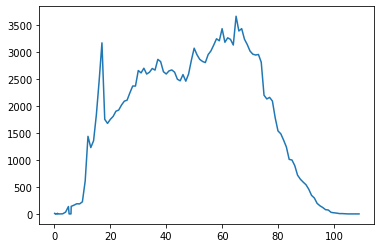

In [ ]:
plt.plot(d43ma1)
plt.show()

In [ ]:
d43f=d43.query('SEX==["F"]')
d43fa=d43f['AGE_YRS']
d43fa=pd.DataFrame(d43fa)
d43fa=d43fa.dropna()
d43fa1=pd.DataFrame(d43fa.AGE_YRS.value_counts())
d43fa1.sort_index(inplace=True)
d43fa1

,AGE_YRS
0.08,13
0.17,10
0.25,3
0.33,10
0.42,4
...,...
105.00,7
106.00,1
113.00,1
115.00,5


In [ ]:
len(d43m)

205689

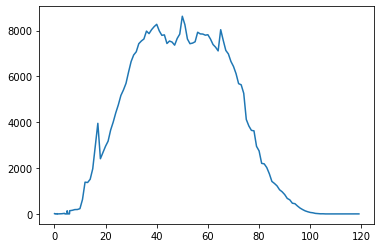

In [ ]:
plt.plot(d43fa1)
plt.show()

In [ ]:
d44=d43.query('DIED==["Y"]')
d44

,VAX_TYPE,VAX_MANU,VAERS_ID,DIED,SEX,AGE_YRS
512,COVID19,MODERNA,917117,Y,M,82.0
1188,COVID19,MODERNA,917790,Y,F,90.0
1191,COVID19,MODERNA,917793,Y,F,78.0
1463,COVID19,MODERNA,918065,Y,M,64.0
1759,COVID19,PFIZER\BIONTECH,918388,Y,F,65.0
...,...,...,...,...,...,...
750395,COVID19,PFIZER\BIONTECH,1919665,Y,F,57.0
750408,COVID19,PFIZER\BIONTECH,1919678,Y,M,NaN
750485,COVID19,JANSSEN,1919838,Y,F,NaN
750517,COVID19,MODERNA,1919878,Y,M,82.0


In [ ]:
d44f=d44.query('SEX==["F"]')
d44fa=d44f['AGE_YRS']
d44fa=pd.DataFrame(d44fa)
d44fa=d44fa.dropna()
d44fa1=pd.DataFrame(d44fa.AGE_YRS.value_counts())
d44fa1.sort_index(inplace=True)
d44fa1

,AGE_YRS
1.08,1
5.00,1
11.00,1
12.00,1
13.00,4
...,...
102.00,6
103.00,4
104.00,3
105.00,1


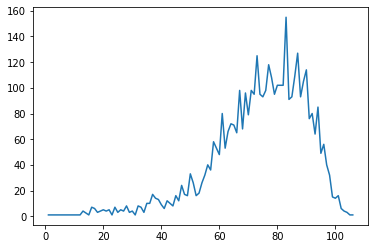

In [ ]:
plt.plot(d44fa1)
plt.show()

In [ ]:
d44m=d44.query('SEX==["M"]')
d44ma=d44m['AGE_YRS']
d44ma=pd.DataFrame(d44ma)
d44ma=d44ma.dropna()
d44ma1=pd.DataFrame(d44ma.AGE_YRS.value_counts())
d44ma1.sort_index(inplace=True)
d44ma1

,AGE_YRS
0.42,1
1.00,1
13.00,3
15.00,5
16.00,5
...,...
99.00,8
100.00,12
101.00,4
102.00,4


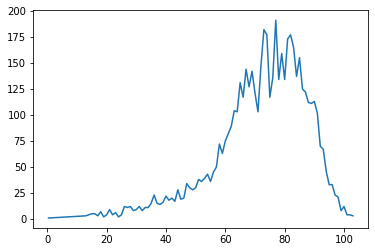

In [ ]:
plt.plot(d44ma1)
plt.show()

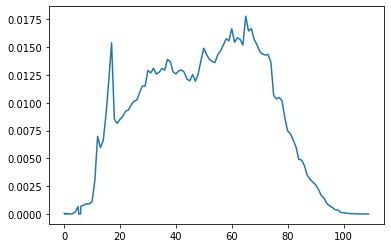

In [ ]:
plt.plot(d43ma1/len(d43m))
plt.show()

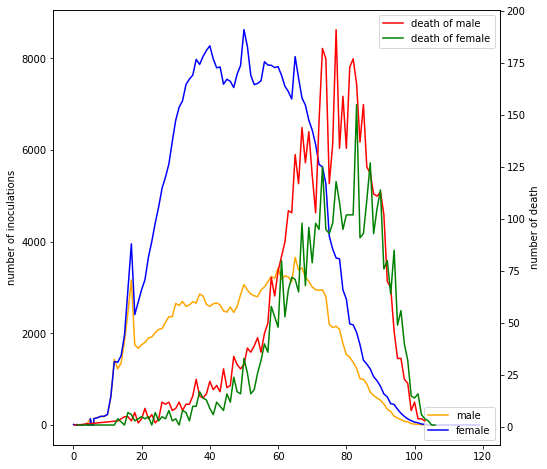

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
ax1.set_ylabel('number of inoculations')
ax1.plot()
g1=plt.plot(d43ma1,color='orange',label='male')
g2=plt.plot(d43fa1,color='blue',label='female')
plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.set_ylabel('number of death')
ax2.plot()
g3=plt.plot(d44ma1,color='red',label='death of male')
g4=plt.plot(d44fa1,color='green',label='death of female')

plt.legend()
plt.show
fig.savefig("img.png")

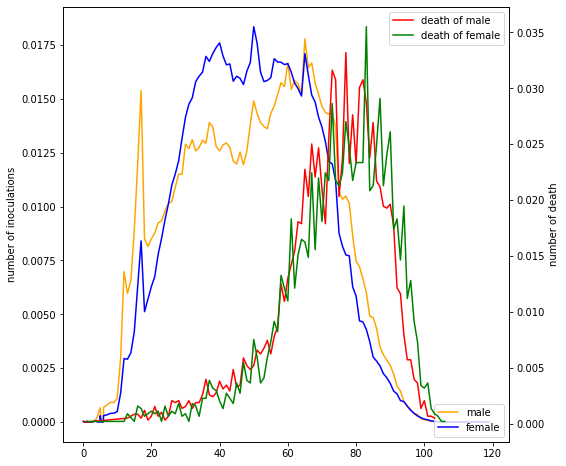

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
ax1.set_ylabel('number of inoculations')
ax1.plot()
g1=plt.plot(d43ma1/len(d43m),color='orange',label='male')
g2=plt.plot(d43fa1/len(d43f),color='blue',label='female')
plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.set_ylabel('number of death')
ax2.plot()
g3=plt.plot(d44ma1/len(d44m),color='red',label='death of male')
g4=plt.plot(d44fa1/len(d44f),color='green',label='death of female')

plt.legend()
plt.show
fig.savefig("img.png")

In [ ]:
len(d43)

699420

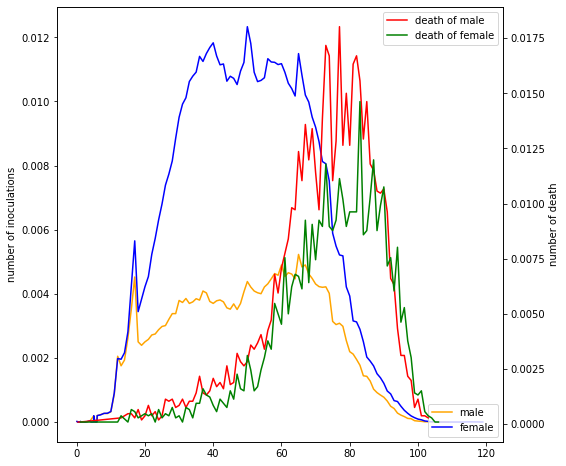

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
ax1.set_ylabel('number of inoculations')
ax1.plot()
g1=plt.plot(d43ma1/len(d43),color='orange',label='male')
g2=plt.plot(d43fa1/len(d43),color='blue',label='female')
plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.set_ylabel('number of death')
ax2.plot()
g3=plt.plot(d44ma1/len(d44),color='red',label='death of male')
g4=plt.plot(d44fa1/len(d44),color='green',label='death of female')

plt.legend()
plt.show
fig.savefig("img.png")

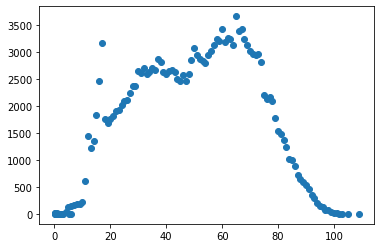

In [ ]:
plt.scatter(d43ma1.index,d43ma1)
plt.show()

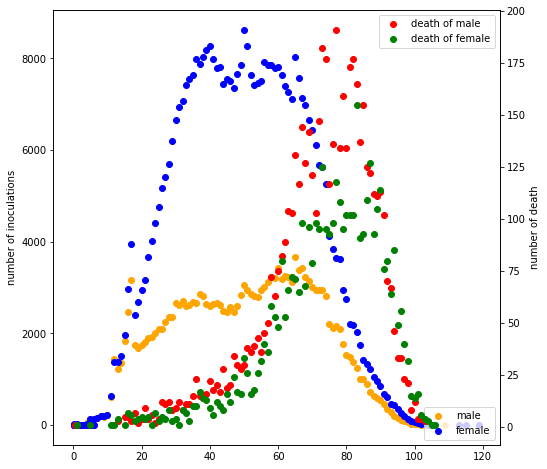

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
ax1.set_ylabel('number of inoculations')
ax1.plot()
g1=plt.scatter(d43ma1.index,d43ma1,color='orange',label='male')
g2=plt.scatter(d43fa1.index,d43fa1,color='blue',label='female')
plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.set_ylabel('number of death')
ax2.plot()
g3=plt.scatter(d44ma1.index,d44ma1,color='red',label='death of male')
g4=plt.scatter(d44fa1.index,d44fa1,color='green',label='death of female')

plt.legend()
plt.show
fig.savefig("img.png")

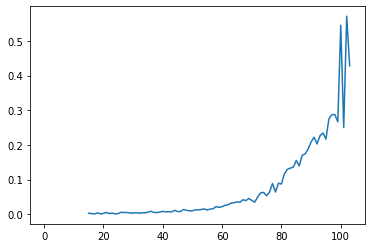

In [ ]:
plt.plot(d44ma1/d43ma1)
plt.show()

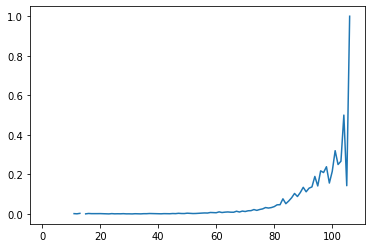

In [ ]:
plt.plot(d44fa1/d43fa1)
plt.show()

In [ ]:
a1=d43fa1/d43ma1

In [ ]:
a2=d44fa1/d44ma1

In [ ]:
len(a2)

99

In [ ]:
a1[12:]

,AGE_YRS
12.0,0.965181
13.0,1.116450
14.0,1.117517
15.0,1.073064
16.0,1.205441
...,...
106.0,NaN
109.0,NaN
113.0,NaN
115.0,NaN


In [ ]:
d43

,VAX_TYPE,VAX_MANU,VAERS_ID,DIED,SEX,AGE_YRS
0,COVID19,MODERNA,916600,NaN,F,33.0
1,COVID19,MODERNA,916601,NaN,F,73.0
2,COVID19,PFIZER\BIONTECH,916602,NaN,F,23.0
3,COVID19,MODERNA,916603,NaN,F,58.0
4,COVID19,MODERNA,916604,NaN,F,47.0
...,...,...,...,...,...,...
750519,COVID19,MODERNA,1919911,Y,F,NaN
750521,COVID19,PFIZER\BIONTECH,1919916,NaN,M,20.0
750533,COVID19,MODERNA,1919941,NaN,F,43.0
750553,COVID19,PFIZER\BIONTECH,1919962,NaN,M,66.0


In [ ]:

d43a=d43['AGE_YRS']
d43a=pd.DataFrame(d43a)
d43a=d43a.dropna()
d43a1=pd.DataFrame(d43a.AGE_YRS.value_counts())
d43a1.sort_index(inplace=True)
d43a1

,AGE_YRS
0.08,25
0.17,19
0.25,6
0.33,17
0.42,8
...,...
106.00,1
109.00,1
113.00,1
115.00,5


In [ ]:
d44a=d44['AGE_YRS']
d44a=pd.DataFrame(d44a)
d44a=d44a.dropna()
d44a1=pd.DataFrame(d44a.AGE_YRS.value_counts())
d44a1.sort_index(inplace=True)
d44a1

,AGE_YRS
0.42,1
1.00,1
1.08,1
5.00,1
11.00,1
...,...
102.00,10
103.00,7
104.00,3
105.00,1


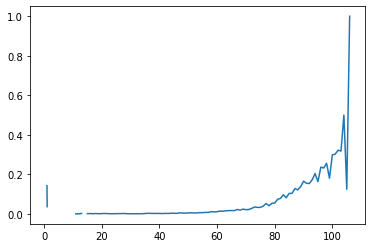

In [ ]:
plt.plot(d44a1/d43a1)
plt.show()

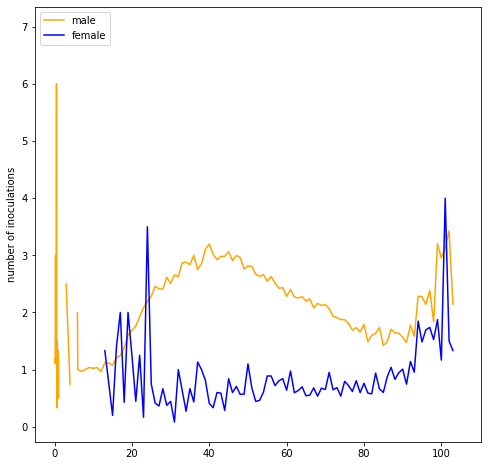

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
ax1.set_ylabel('number of inoculations')
ax1.plot()
g1=plt.plot(d43fa1/d43ma1,color='orange',label='male')
g2=plt.plot(d44fa1/d44ma1,color='blue',label='female')
plt.legend()

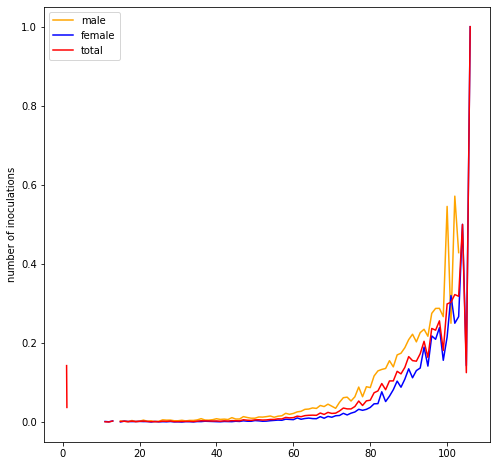

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
ax1.set_ylabel('number of inoculations')
ax1.plot()
g1=plt.plot(d44ma1/d43ma1,color='orange',label='male')
g2=plt.plot(d44fa1/d43fa1,color='blue',label='female')
g3=plt.plot((d44a1/d43a1),color='red',label='total')
plt.legend()


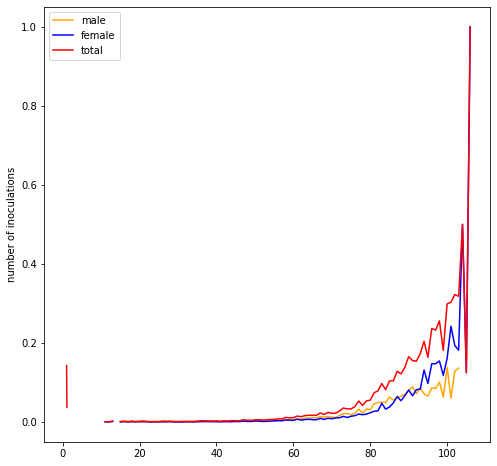

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
ax1.set_ylabel('number of inoculations')
ax1.plot()
g1=plt.plot(d44ma1/d43a1,color='orange',label='male')
g2=plt.plot(d44fa1/d43a1,color='blue',label='female')
g3=plt.plot((d44a1/d43a1),color='red',label='total')
plt.legend()


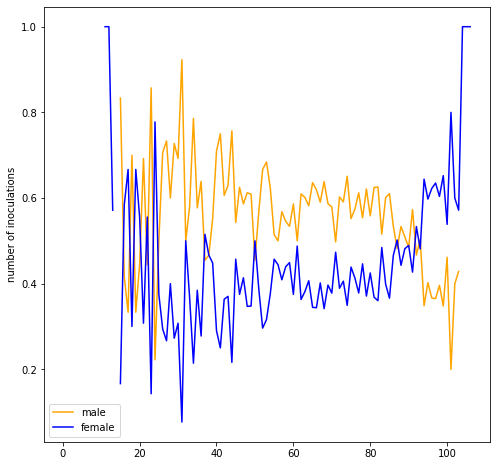

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
ax1.set_ylabel('number of inoculations')
ax1.plot()
g1=plt.plot((d44ma1/d43a1)/(d44a1/d43a1),color='orange',label='male')
g2=plt.plot((d44fa1/d43a1)/(d44a1/d43a1),color='blue',label='female')

plt.legend()

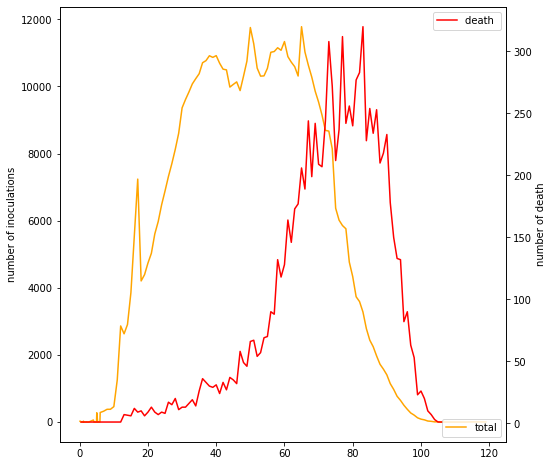

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
ax1.set_ylabel('number of inoculations')
ax1.plot()
g1=plt.plot(d43a1,color='orange',label='total')

plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.set_ylabel('number of death')
ax2.plot()
g3=plt.plot(d44a1,color='red',label='death ')

plt.legend()
plt.show
fig.savefig("img.png")

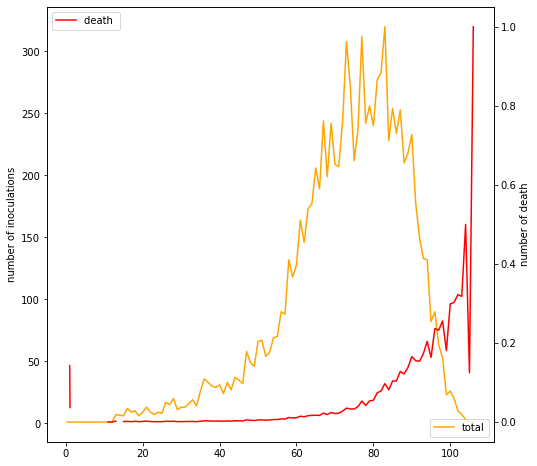

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
ax1.set_ylabel('number of inoculations')
ax1.plot()
g1=plt.plot(d44a1,color='orange',label='total')

plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.set_ylabel('number of death')
ax2.plot()
g3=plt.plot(d44a1/d43a1,color='red',label='death ')

plt.legend()
plt.show
fig.savefig("img.png")

In [ ]:
a3[100:106]

,AGE_YRS
100.0,0.298851
101.0,0.303030
102.0,0.322581
103.0,0.318182
104.0,0.500000
105.0,0.125000
106.0,1.000000


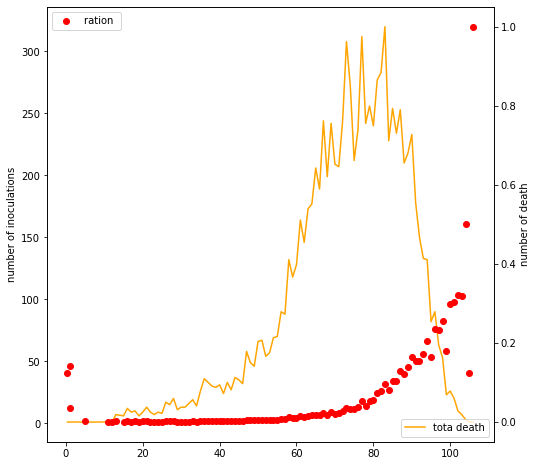

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
ax1.set_ylabel('number of inoculations')
ax1.plot()
g1=plt.plot(d44a1,color='orange',label='tota death')

plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.set_ylabel('number of death')
ax2.plot()
g3=plt.scatter(a3.index,d44a1/d43a1,color='red',label='ration ')

plt.legend()
plt.show
fig.savefig("img.png")

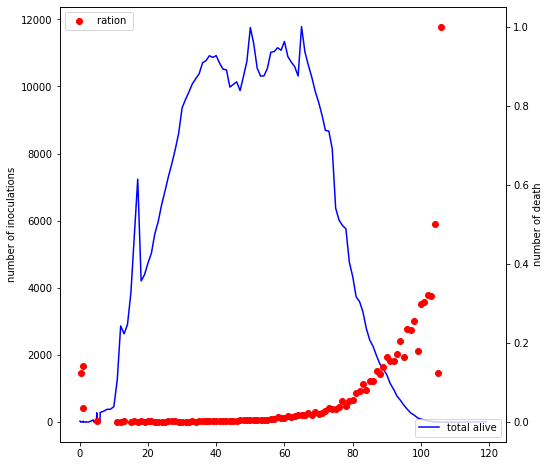

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
ax1.set_ylabel('number of inoculations')
ax1.plot()

g2=plt.plot(d43a1,color='blue',label='total alive')

plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.set_ylabel('number of death')
ax2.plot()
g3=plt.scatter(a3.index,d44a1/d43a1,color='red',label='ration ')

plt.legend()
plt.show
fig.savefig("img.png")

In [ ]:
plt.plot

In [ ]:
a3=d44a1/d43a1
a3.describe()

,AGE_YRS
count,99.000000
mean,0.068526
std,0.132803
min,0.000349
25%,0.002623
50%,0.011834
75%,0.089729
max,1.000000


In [ ]:
a3[20:108]

,AGE_YRS
20.0,0.001899
21.0,0.002584
22.0,0.001605
23.0,0.001172
24.0,0.001390
...,...
102.0,0.322581
103.0,0.318182
104.0,0.500000
105.0,0.125000


In [ ]:
d43a1[20:106]

,AGE_YRS
20.0,4740
21.0,5030
22.0,5606
23.0,5975
24.0,6475
...,...
102.0,31
103.0,22
104.0,6
105.0,8


AGE_YRS 
0.125000    2
1.000000    1
0.003610    1
0.002662    1
0.002668    1
           ..
0.039388    1
0.042014    1
0.053279    1
0.053703    1
0.000349    1
Length: 98, dtype: int64

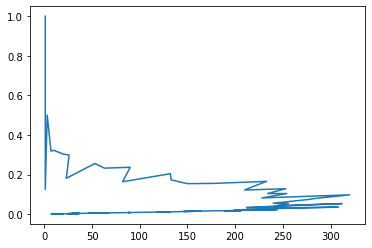

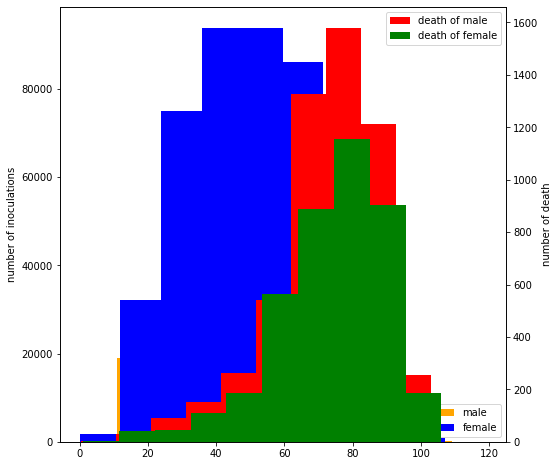

In [ ]:
fig,ax1=plt.subplots(figsize=(8,8))
ax1.set_ylabel('number of inoculations')
ax1.plot()
g1=plt.hist(d43m['AGE_YRS'],color='orange',label='male')

g2=plt.hist(d43f['AGE_YRS'],color='blue',label='female')
plt.legend(loc='lower right')
ax2=ax1.twinx()
ax2.set_ylabel('number of death')
ax2.plot()
g3=plt.hist(d44m['AGE_YRS'],color='red',label='death of male')
g4=plt.hist(d44f['AGE_YRS'],color='green',label='death of female')

plt.legend()
plt.show
fig.savefig("img.png")

In [ ]:
d43ma=pd.DataFrame(d43ma.value_counts())

In [ ]:
d43ma

,AGE_YRS
65.00,3657
67.00,3428
60.00,3427
66.00,3384
62.00,3258
...,...
0.83,1
109.00,1
1.83,1
105.00,1


In [ ]:
d43fa=pd.DataFrame(d43fa.value_counts())

In [ ]:
d43ma.index

Float64Index([ 65.0,  67.0,  60.0,  66.0,  62.0,  58.0,  68.0,  63.0,  59.0,
               61.0,
              ...
                0.5,  5.25,  1.25,  0.25,  1.75,  0.83, 109.0,  1.83, 105.0,
                1.5],
             dtype='float64', length=124)

TypeError: ignored

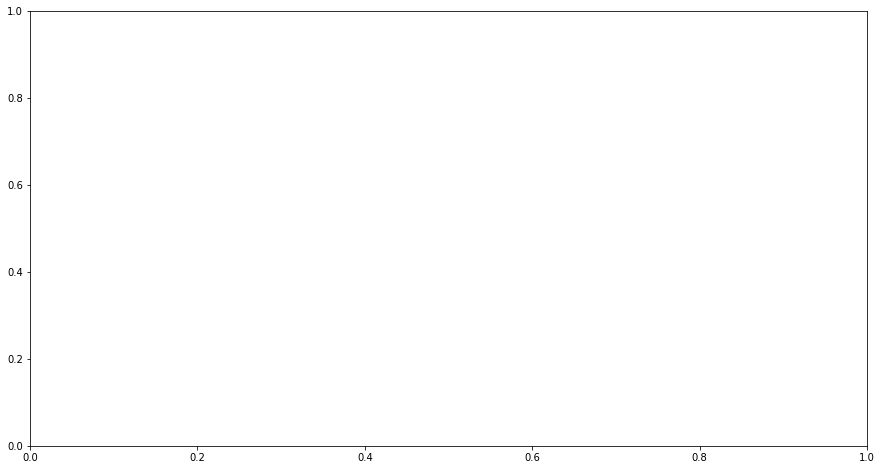

In [ ]:
fig = plt.figure(figsize=(15,8))
g1=plt.hist(d43m,label='男性')
g2=plt.hist(d43f,label='女性')
plt.legend(loc='upper left')
plt.show()